# Procedure for quantum state preparation (QSP) experiment.

QSP is presented clearly in [this publication](https://arxiv.org/abs/2306.17422). The basic idea is that we have two unitary $U(\theta)$ and $V^{\dagger}$, we optimize the parameter $\theta$ until $\theta^{*}$ such that $U(\theta^{*})V^{\dagger}=I$.

So we will do experiment with various $U$, $V^{\dagger}$ and optimize strategy. 

Some notation for hyperparameter:

(important)
- Ansatz: $U$ (defined in `qtm.ansatz`)
- Optimize circuit: $u$ (ansatz when repeat $L$ times)
- State: $V^{\dagger}$ (defined in `qtm.state`)
- Number of qubit: $n$ (`num_qubits`)
- Number of layer (for ansatz): $L$ (`num_layers`)
- $\theta$: theta (if $\theta$ is scalar), thetas (if $\theta$ is 1-d numpy array) and thetass (if $\theta$ is 2-d numpy array).

(not important)
- Number of iteration: $n_{iter}$ (`num_iter / iter`)
- Optimizer: `sgd`, `adam` or `qng` family.

Here is your task, run the below codes with:

- $U$ is `qtm.ansatz.g2`, `qtm.ansatz.g2gn`, `qtm.ansatz.g2gnw`.
- $V^{\dagger}$ is `qtm.state.create_GHZ_state`, `qtm.state.create_W_state`, `qtm.state.create_AME_state`
- $n$ from 3 - 10.
- $L$ from 1 - 10.
- 



In [1]:
import sys
sys.path.insert(0, '..')
import qtm.qcompilation
import matplotlib.pyplot as plt
import qiskit
import qtm.qsp
import qtm.ansatz, qtm.state
%load_ext autoreload
%autoreload 2

### Quantum State Preparation (QSP) problem

First, using Quantum Compilation (QC) to find optimized $\theta$

In [3]:
num_qubits = 3
num_layers = 2
optimizer = 'adam'
compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.g2gn(num_qubits, num_layers),
    vdagger = qtm.state.create_haar_state_inverse(num_qubits),
    optimizer = optimizer,
    loss_func = 'loss_fubini_study'
)
compiler.fit(num_steps = 100, verbose = 1)

Step: 100%|██████████| 100/100 [00:44<00:00,  2.25it/s]


If last fidelity of compiler near 0, we will do the next steps. Otherwise, trying other optimizers and loss_func, then take the best result in that collection.

In [9]:
compiler.vdagger.draw()

┌──────────────────┐     ┌─────────────────┐     »
q0_0: ─────┤ U(-1.0409,0,0,0) ├─────┤ U(1.0409,0,0,0) ├─────»
      ┌───┐└────────┬─────────┘     └────────┬────────┘     »
q0_1: ┤ X ├─────────┼────────────■───────────┼───────────■──»
      ├───┤         │          ┌─┴─┐         │         ┌─┴─┐»
q0_2: ┤ X ├─────────■──────────┤ X ├─────────■─────────┤ X ├»
      └───┘                    └───┘                   └───┘»
«      ┌──────────────────┐     ┌─────────────────┐     ┌──────────────────┐»
«q0_0: ┤ U(-1.0409,0,0,0) ├─────┤ U(1.5155,0,0,0) ├─────┤ U(-1.5155,0,0,0) ├»
«      └────────┬─────────┘┌───┐└────────┬────────┘     └────────┬─────────┘»
«q0_1: ─────────■──────────┤ X ├─────────┼───────────■───────────┼──────────»
«             ┌───┐        ├───┤         │         ┌─┴─┐         │          »
«q0_2: ───────┤ X ├────────┤ X ├─────────■─────────┤ X ├─────────■──────────»
«             └───┘        └───┘                   └───┘                    »
«           ┌─────────────────┐     ┌──────────────────┐     »
«q0_0: ─────┤ U(1.5155,0,0,0) ├─────┤ U(-3.7974,0,0,0) ├─────»
«           └────────┬────────┘┌───┐└────────┬─────────┘     »
«q0_1: ──■───────────■─────────┤ X ├─────────┼────────────■──»
«      ┌─┴─┐       ┌───┐       └───┘         │          ┌─┴─┐»
«q0_2: ┤ X ├───────┤ X ├─────────────────────■──────────┤ X ├»
«      └───┘       └───┘                                └───┘»
«      ┌─────────────────┐     ┌──────────────────┐     ┌──────────────────┐»
«q0_0: ┤ U(3.7974,0,0,0) ├─────┤ U(-3.7974,0,0,0) ├─────┤ U(-2.5997,0,0,0) ├»
«      └────────┬────────┘     └────────┬─────────┘┌───┐└────────┬─────────┘»
«q0_1: ─────────┼───────────■───────────■──────────┤ X ├─────────┼──────────»
«               │         ┌─┴─┐                    └───┘         │          »
«q0_2: ─────────■─────────┤ X ├──────────────────────────────────■──────────»
«                         └───┘                                             »
«           ┌─────────────────┐     ┌──────────────────┐                    »
«q0_0: ─────┤ U(2.5997,0,0,0) ├─────┤ U(-2.5997,0,0,0) ├────────────────────»
«           └────────┬────────┘     └────────┬─────────┘┌──────────────────┐»
«q0_1: ──■───────────┼───────────■───────────■──────────┤ U(-1.2809,0,0,0) ├»
«      ┌─┴─┐         │         ┌─┴─┐       ┌───┐        └────────┬─────────┘»
«q0_2: ┤ X ├─────────■─────────┤ X ├───────┤ X ├─────────────────■──────────»
«      └───┘                   └───┘       └───┘                            »
«                                              
«q0_0: ────────────────────────────────────────
«           ┌──────────────────┐               
«q0_1: ─────┤ U(-0.4145,0,0,0) ├───────────────
«      ┌───┐└────────┬─────────┘┌─────────────┐
«q0_2: ┤ X ├─────────■──────────┤ Ry(-1.5507) ├
«      └───┘                    └─────────────┘

Then, create QSP object from compiler, note that Quantum Compilation (QC) is the superset of QSP. There are multiple way to initialize a QSP object: from compiler, from file or using constructor.

In [6]:
qspobj = qtm.qsp.QuantumStatePreparation.load_from_compiler(compiler, qtm.ansatz.g2gn)

Important, you must save the result in the folder experiments/qsp/, where the 'state' argument is the name of state which is need to prepare. The name of file will be automatically create followed this format:

```
[state]_[ansatz]_[num_qubits]_[num_layers].qspobj
```

In [7]:
qspobj.save(state = 'ame', file_name='../experiments/qsp/')

Last step, load QSP from saved file and check its properties.

In [8]:
qspobj2 = qtm.qsp.QuantumStatePreparation.load_from_file('../experiments/qsp/ame_g2gn_3_2.qspobj')

In [9]:
qspobj2.fidelity

0.00029996816748710953

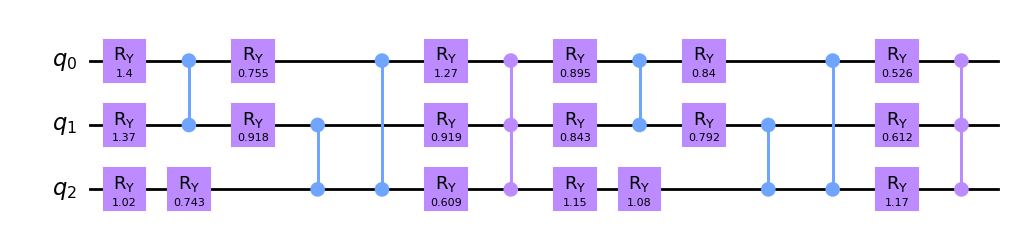

In [10]:
qspobj2.qc.draw('mpl')